In [30]:
import cv2
import numpy
import matplotlib.pyplot as plt
import pytesseract

In [31]:
img = cv2.imread('../raw_data/all_menus/english_menu_9.jpg') # load image

In [32]:
img.shape # heigt

(209, 334, 3)

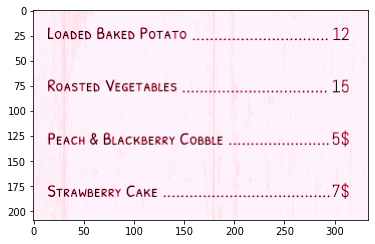

In [33]:
plt.imshow(img);

In [34]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to black and white 

In [40]:
img_gray.shape

(209, 334)

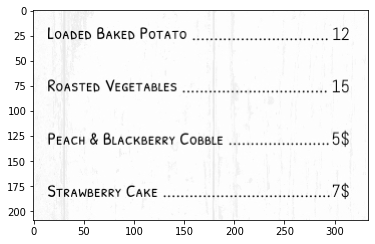

In [42]:
plt.imshow(img_gray, cmap='gray');

In [98]:
ret, img_thresh = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY) # convert to threshold

128.0


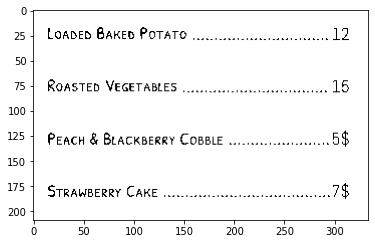

In [99]:
plt.imshow(img_thresh, cmap='gray');
print(ret)

In [89]:
pytesseract.image_to_string(img)

'Loapep Bakep Potato\n\nRoasTep VEGETABLES\n\nPeach & BLackserry Copale\n\n‘STRAWBERRY CAKE .\n'

In [90]:
pytesseract.image_to_string(img_gray)

'Loapep Bakep Potato ...\n\nRoasTeD VEGETABLES ..\n\nPeach & Biackserry Cosste .....\n\n‘STRAWBERRY CAKE\n\n'

In [100]:
pytesseract.image_to_string(img_thresh)

'Loapen Baked Potaro ...\n\nRoasted VEGETABLES\n\n16\n\nPeach & BrackBerry COBBLE ....... socesenees BG\n\n‘STRAWBERRY CAKE ....\n\nery\n\n'

In [101]:
from google.cloud import vision

In [111]:
from __future__ import print_function
from google.cloud import vision

image_uri = 'gs://cloud-vision-codelab/otter_crossing.jpg'

client = vision.ImageAnnotatorClient()
image = vision.Image()
image.source.image_uri = image_uri

response = client.text_detection(image=image)

for text in response.text_annotations:
    print('=' * 30)
    print(text.description)
    vertices = ['(%s,%s)' % (v.x, v.y) for v in text.bounding_poly.vertices]
    print('bounds:', ",".join(vertices))

CAUTION
Otters crossing
for next 6 miles
bounds: (59,243),(249,243),(249,341),(59,341)
CAUTION
bounds: (75,244),(232,243),(232,269),(75,270)
Otters
bounds: (64,293),(141,294),(141,315),(64,314)
crossing
bounds: (150,294),(248,295),(248,316),(150,315)
for
bounds: (59,321),(94,320),(94,339),(59,340)
next
bounds: (104,320),(156,319),(156,338),(104,339)
6
bounds: (166,320),(178,320),(178,338),(166,338)
miles
bounds: (189,319),(249,318),(249,337),(189,338)


In [113]:
def detect_text_uri(uri):
    """Detects text in the file located in Google Cloud Storage or on the Web.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()
    image = vision.Image()
    image.source.image_uri = uri

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [117]:
detect_text_uri('https://s3.amazonaws.com/thumbnails.venngage.com/template/bfb0005c-32af-44a4-bc0e-e52bd2c9e142.png')

Texts:

"BURGER
SHACK
BURGERS
SINGLE BURGER
DOUBLE BURGER
SINGLE CHEESEBURGER
DOUBLE CHEESEBURGER
VEGGIE BURGER
VEGAN BURGER
FRIES
ORIGINAL FRIES
CHEESE FRIES
BACON FRIES
BACON AND CHEESE FRIES
DRINKS
ORIGINAL LEMONADE
SEASONAL LEMONADE
FOUNTAIN SODA
$4.00
$5.00
$4.50
$5.50
$5.00
$6.00
$3.00
$4.00
$4.50
$5.00
$2.00
$2.50
$1.75"
bounds: (95,88),(764,88),(764,968),(95,968)

"BURGER"
bounds: (95,309),(291,309),(291,340),(95,340)

"SHACK"
bounds: (112,351),(274,351),(274,383),(112,383)

"BURGERS"
bounds: (390,88),(540,88),(540,109),(390,109)

"SINGLE"
bounds: (390,175),(456,175),(456,188),(390,188)

"BURGER"
bounds: (463,175),(541,175),(541,188),(463,188)

"DOUBLE"
bounds: (391,218),(468,218),(468,230),(391,230)

"BURGER"
bounds: (476,218),(553,218),(553,230),(476,230)

"SINGLE"
bounds: (390,258),(455,258),(455,273),(390,273)

"CHEESEBURGER"
bounds: (462,258),(614,257),(614,272),(462,273)

"DOUBLE"
bounds: (391,300),(467,300),(467,315),(391,315)

"CHEESEBURGER"
bounds: (475,300),(628,299),

In [118]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

        print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [119]:
detect_text('../raw_data/all_menus/english_menu_9.jpg')

Texts:

"LOADED BAKED POTATO........
ROASTED VEGETABLES
PEACH & BLACKBERRY COBBLE
STRAWBERRY CAKE
....... 12
...... 15
...... 5$
.....7$"
bounds: (13,16),(315,16),(315,186),(13,186)

"LOADED"
bounds: (13,17),(59,17),(59,30),(13,30)

"BAKED"
bounds: (63,17),(102,17),(102,30),(63,30)

"POTATO"
bounds: (106,17),(153,17),(153,30),(106,30)

"........"
bounds: (157,17),(192,17),(192,30),(157,30)

"ROASTED"
bounds: (14,69),(67,69),(67,81),(14,81)

"VEGETABLES"
bounds: (71,69),(143,69),(143,81),(71,81)

"PEACH"
bounds: (15,122),(52,122),(52,133),(15,133)

"&"
bounds: (57,122),(65,122),(65,133),(57,133)

"BLACKBERRY"
bounds: (70,122),(142,122),(142,133),(70,133)

"COBBLE"
bounds: (146,122),(188,122),(188,133),(146,133)

"STRAWBERRY"
bounds: (14,174),(88,174),(88,185),(14,185)

"CAKE"
bounds: (93,174),(124,174),(124,185),(93,185)

"......."
bounds: (264,16),(295,16),(295,30),(264,30)

"12"
bounds: (297,16),(314,16),(314,29),(297,29)

"......"
bounds: (268,69),(293,69),(293,81),(268,81)

"15"
bou

In [1]:
def text_detection_full_response(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    return response

In [3]:
response = text_detection_full_response('../raw_data/all_menus/english_menu_9.jpg')

In [4]:
response

text_annotations {
  locale: "en"
  description: "LOADED BAKED POTATO........\nROASTED VEGETABLES\nPEACH & BLACKBERRY COBBLE\nSTRAWBERRY CAKE\n....... 12\n...... 15\n...... 5$\n.....7$"
  bounding_poly {
    vertices {
      x: 13
      y: 16
    }
    vertices {
      x: 315
      y: 16
    }
    vertices {
      x: 315
      y: 186
    }
    vertices {
      x: 13
      y: 186
    }
  }
}
text_annotations {
  description: "LOADED"
  bounding_poly {
    vertices {
      x: 13
      y: 17
    }
    vertices {
      x: 59
      y: 17
    }
    vertices {
      x: 59
      y: 30
    }
    vertices {
      x: 13
      y: 30
    }
  }
}
text_annotations {
  description: "BAKED"
  bounding_poly {
    vertices {
      x: 63
      y: 17
    }
    vertices {
      x: 102
      y: 17
    }
    vertices {
      x: 102
      y: 30
    }
    vertices {
      x: 63
      y: 30
    }
  }
}
text_annotations {
  description: "POTATO"
  bounding_poly {
    vertices {
      x: 106
      y: 17
    }
    

In [65]:
full_text = response.text_annotations[0]

In [69]:
print(full_text.description)

LOADED BAKED POTATO........
ROASTED VEGETABLES
PEACH & BLACKBERRY COBBLE
STRAWBERRY CAKE
....... 12
...... 15
...... 5$
.....7$


In [63]:
def text_show_cords(path):
    import io
    from google.cloud import vision
    from matplotlib import pyplot as plt
    from matplotlib import patches as pch
  
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image:
        content = image.read()
      
    image = vision.Image(content = content)
    response = client.text_detection(image = image)
    texts = response.text_annotations
    
    a = plt.imread(path)
    fig, ax = plt.subplots(1)
    ax.imshow(a)
    
    for text in texts:
        print(text.description)
      
        vertices = ([(vertex.x, vertex.y) 
                 for vertex in text.bounding_poly.vertices]) 
    
        print('Vertices covering text: {}\n\n'.format(vertices))
        rect = pch.Rectangle(vertices[0], (vertices[1][0] - vertices[0][0]), 
                        (vertices[2][1] - vertices[0][1]), linewidth = 1, 
                                       edgecolor ='r', facecolor ='none') 
        ax.add_patch(rect)
    


LOADED BAKED POTATO........
ROASTED VEGETABLES
PEACH & BLACKBERRY COBBLE
STRAWBERRY CAKE
....... 12
...... 15
...... 5$
.....7$
Vertices covering text: [(13, 16), (315, 16), (315, 186), (13, 186)]


LOADED
Vertices covering text: [(13, 17), (59, 17), (59, 30), (13, 30)]


BAKED
Vertices covering text: [(63, 17), (102, 17), (102, 30), (63, 30)]


POTATO
Vertices covering text: [(106, 17), (153, 17), (153, 30), (106, 30)]


........
Vertices covering text: [(157, 17), (192, 17), (192, 30), (157, 30)]


ROASTED
Vertices covering text: [(14, 69), (67, 69), (67, 81), (14, 81)]


VEGETABLES
Vertices covering text: [(71, 69), (143, 69), (143, 81), (71, 81)]


PEACH
Vertices covering text: [(15, 122), (52, 122), (52, 133), (15, 133)]


&
Vertices covering text: [(57, 122), (65, 122), (65, 133), (57, 133)]


BLACKBERRY
Vertices covering text: [(70, 122), (142, 122), (142, 133), (70, 133)]


COBBLE
Vertices covering text: [(146, 122), (188, 122), (188, 133), (146, 133)]


STRAWBERRY
Vertices cov

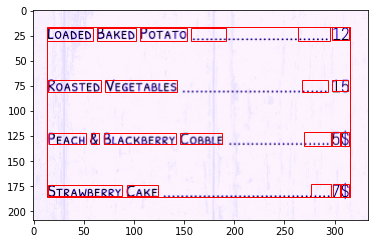

In [64]:
text_show_cords('../raw_data/all_menus/english_menu_9.jpg')